# Image Classification Using CNN with the CIFAR-10 Dataset

| **Property**      | **Description**                                                                                                          |
|-------------------|--------------------------------------------------------------------------------------------------------------------------|
| **Dataset Name**  | CIFAR-10                                                                                                                 |
| **Contents**      | 60,000 color images (32x32 pixels) divided into 10 classes: airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, trucks. |
| **Structure**     | 50,000 training images and 10,000 test images, with an equal number of images per class in both sets.                    |
| **Purpose**       | Used for evaluating image classification algorithms and serves as a benchmark for comparing models in computer vision.    |
| **Challenges**    | The small image size and diverse classes make it a challenging problem for models, ideal for testing deep learning architectures. |


## step 1: Importing the necessary libraries.

In [19]:
# Importing the necessary libraries.
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

## Step 2: Loading and pre-processing of the CIFAR-10 dataset.

In [3]:
# Loading and pre-processing of the CIFAR-10 dataset.
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

## Step 3: Normalising pixel values to be between 0 and 1.

In [4]:
# Normalising pixel values to be between 0 and 1.
train_images = train_images/255.0
test_images = test_images/255.0

## Step 4: Defining the class names for CIFAR-10 images.

In [5]:
# Defining the class names for CIFAR-10 images.
class_name = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Step 5: Visulaising a few training images from the CIFAR-10 dataset.

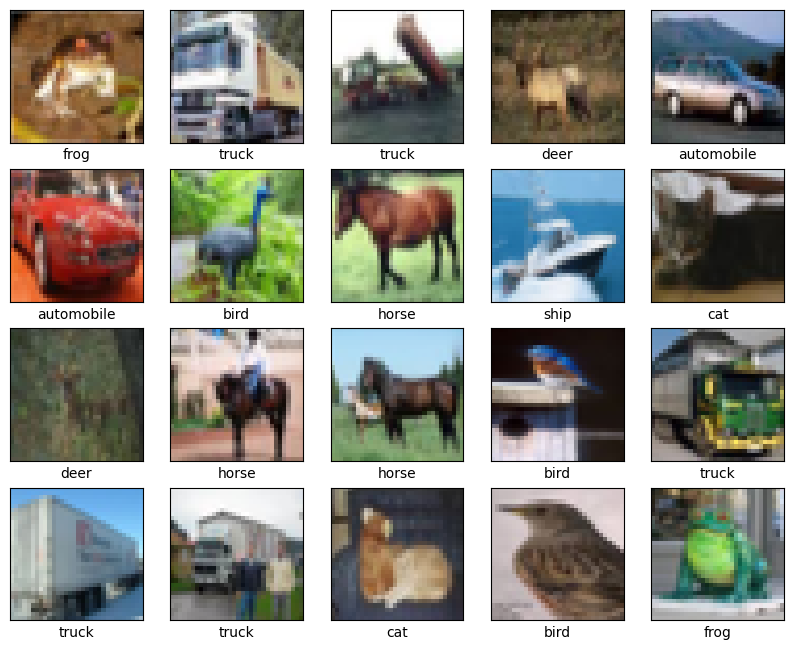

In [7]:
# Visulaising a few training images from the CIFAR-10 dataset.
plt.figure(figsize=(10,10))
for i in range(20):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap = plt.cm.binary)
  plt.xlabel(class_name[train_labels[i][0]])
plt.show()

## Step 6: Building the CNN model (customised model).

In [10]:
# Building the CNN model (customised model).

# Initialize a Sequential model
model = models.Sequential([

    # Add a 2D convolutional layer with 32 filters, a 3x3 kernel, and ReLU activation function
    # The input shape is set to 32x32x3, which corresponds to the size of the CIFAR-10 images
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    
    # Add a 2D max pooling layer with a 2x2 pool size to downsample the feature maps
    layers.MaxPooling2D((2,2)),
    
    # Add another 2D convolutional layer with 64 filters and a 3x3 kernel, using ReLU activation
    layers.Conv2D(64, (3,3), activation='relu'),
    
    # Add another 2D max pooling layer to further downsample the feature maps
    layers.MaxPooling2D((2,2)),
    
    # Add a third 2D convolutional layer with 64 filters and a 3x3 kernel, using ReLU activation
    layers.Conv2D(64, (3,3), activation='relu'),
    
    # Flatten the output from the convolutional layers to prepare it for the dense layers
    layers.Flatten(),
    
    # Add a dense (fully connected) layer with 64 units and ReLU activation function
    layers.Dense(64, activation='relu'),
    
    # Add a dense layer with 10 units (one for each class in CIFAR-10) without an activation function
    # The output will be logits that can be used for classification
    layers.Dense(10)
])


## Step 7: Printing the model summary.

In [11]:
# Printing the model summary.
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

## Step 8: Compiling the CNN model.

In [12]:
# Compiling the CNN model.
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
              )


## Step 9: Training the CNN model.

In [13]:
# Training the CNN model.
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 25ms/step - accuracy: 0.3381 - loss: 1.7904 - val_accuracy: 0.5272 - val_loss: 1.3170
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 21ms/step - accuracy: 0.5405 - loss: 1.2802 - val_accuracy: 0.5630 - val_loss: 1.2281
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 37ms/step - accuracy: 0.6094 - loss: 1.0996 - val_accuracy: 0.6206 - val_loss: 1.0611
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 29ms/step - accuracy: 0.6492 - loss: 1.0077 - val_accuracy: 0.6620 - val_loss: 0.9717
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 53s 34ms/step - accuracy: 0.6789 - loss: 0.9160 - val_accuracy: 0.6717 - val_loss: 0.9442
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.6937 - loss: 0.8737 - val_accuracy: 0.6802 - val_loss: 0.9253
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.7196 - loss: 0.8017 - val_accuracy: 0.6835 - val_loss: 0.9074
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.7285 -

## Step 10: Evaluating the performance of the CNN model.

In [14]:
# Evaluating the performance of the CNN model.
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\n Test accuracy is: {test_acc}')


313/313 - 2s - 7ms/step - accuracy: 0.7025 - loss: 0.8905

 Test accuracy is: 0.7024999856948853


## Step 11: Plotting the training and validation accuracy and loss values.

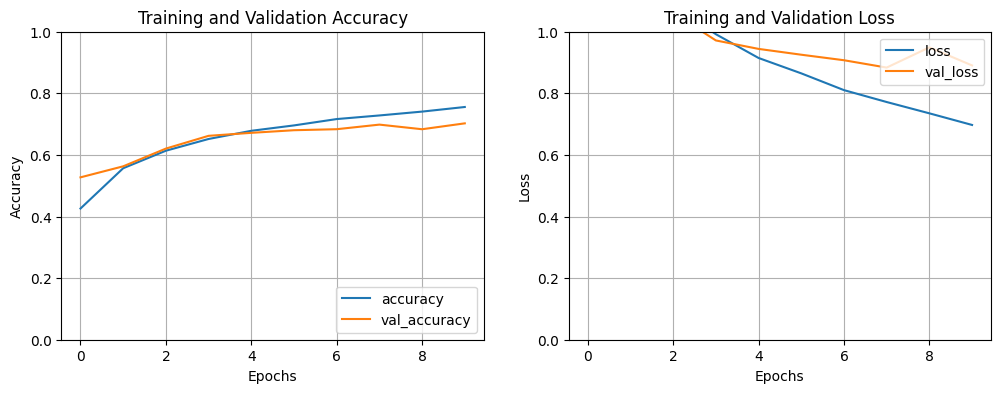

In [15]:
# Step 11: Plotting the training and validation accuracy and loss values.
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.grid()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim([0,1])
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.grid()

plt.show()

# Hyper tuning the CNN model

In [16]:
# Define a function to build the model.
def build_model(hp):
    model = models.Sequential()

    # Tune the number of Convolutional Layers (1, 2 or 3)
    for i in range(hp.Int('conv_layers', 1, 3)):
      if i == 0:
        model.add(layers.Conv2D(
            filters = hp.Int('filters_' + str(i), min_value=32, max_value=128, step=16),
            kernel_size = (3, 3),
            activation = 'relu',
            input_shape = (32, 32, 3)
        ))
      else:
        model.add(layers.Conv2D(
          filters = hp.Int('filters_' + str(i), min_value=32, max_value=128, step=16),
          kernel_size = (3, 3),
          activation = 'relu',
          padding = 'same'))

        model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(layers.Flatten())

    # Tune the number of Dense Layers (1,2 or 3)
    for i in range(hp.Int('dense_layers', 1, 3)):
      model.add(layers.Dense(
          units = hp.Int('units_' + str(i), min_value=32, max_value=128, step=16),
          activation = 'relu'))

      # Tune the dropout rate
      model.add(layers.Dropout(rate=hp.Float('dropout_' + str(i), min_value=0.0, max_value=0.5, step=0.1)))

    # The last dense layer with 10 output units (for 10 classes of CIFAR-10 dataset)
    model.add(layers.Dense(10))

    # Choose an optimizer and learning rate
    optimizer = tf.keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4]))

    model.compile(optimizer=optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

    return model

In [22]:
# Import necessary libraries
from keras_tuner.tuners import RandomSearch            # For hyperparameter tuning

# Define the Tuner using Random Search
tuner = RandomSearch(
    build_model,                  # The model-building function that defines the architecture to be tuned
    objective='val_accuracy',     # The objective to optimize; in this case, validation accuracy
    max_trials=10,                # The maximum number of different models to try
    executions_per_trial=1,       # The number of times to train each model (for more robust results)
    directory='my_dir',           # Directory where the tuning results will be saved
    project_name='cifar10_tunning' # Name of the project, used to organize the results
)


c:\Users\abbas\miniconda3\envs\hugging_face\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
# Perform the Hyperparameter search
tuner.search(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

Trial 3 Complete [00h 14m 10s]
val_accuracy: 0.2815999984741211

Best val_accuracy So Far: 0.5468999743461609
Total elapsed time: 00h 51m 24s

Search: Running Trial #4

Value             |Best Value So Far |Hyperparameter
2                 |1                 |conv_layers
32                |64                |filters_0
1                 |2                 |dense_layers
112               |96                |units_0
0                 |0.4               |dropout_0
0.0001            |0.0001            |learning_rate
80                |112               |units_1
0.3               |0.1               |dropout_1
48                |None              |units_2
0.1               |None              |dropout_2

Epoch 1/5
 741/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 47ms/step - accuracy: 0.2753 - loss: 2.0082

In [ ]:
# Get the best Hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

In [ ]:
# Build the model with the best Hyperparameters and train it
model = tuner.hypermodel.build(best_hps)
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

In [ ]:
# Plotting training & validation accuracy and loss values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.grid()

plt.show()

# LeNet-5 Architecture

In [ ]:
# Step 1: Importing the necessary libraries.
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Step 2: Loading and pre-processing of the CIFAR-10 dataset.
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Step 3: Normalizing pixel values to be between 0 and 1.
train_images = train_images / 255.0
test_images = test_images / 255.0

# Step 4: One-hot encode the labels.
# This step is required to use the loss function "categorical_crossentropy".
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

# Step 5: Defining the class names for CIFAR-10 images.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Step 6: Visualizing a few training images from the CIFAR-10 dataset.
# plt.figure(figsize=(10, 10))
# for i in range(25):
#     plt.subplot(5, 5, i + 1)
#     plt.xticks([])
#     plt.yticks([])
#     plt.grid(False)
#     plt.imshow(train_images[i])
#     plt.xlabel(class_names[train_labels[i].argmax()])  # Using argmax to get the label index
# plt.show()

# Step 7: Building the CNN model (LeNet-5 CNN Architecture).
model = models.Sequential([
    layers.Conv2D(6, (5, 5), activation='tanh', input_shape=(32, 32, 3)),
    layers.AveragePooling2D((2, 2)),
    layers.Conv2D(16, (5, 5), activation='tanh'),
    layers.AveragePooling2D((2, 2)),
    layers.Conv2D(120, (5, 5), activation='tanh'),
    layers.Flatten(),
    layers.Dense(84, activation='tanh'),
    layers.Dense(10, activation='softmax')
])

# Step 8: Printing the model summary.
model.summary()

# Step 9: Compiling the CNN model.
model.compile(optimizer='adam',  # Adam uses a default learning rate of 0.001
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Step 10: Training the CNN model.
history = model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_data=(test_images, test_labels))

# Step 11: Evaluating the performance of the CNN model.
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy is: {test_acc}')

In [ ]:
# Plotting training and validation accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.grid(True)

# Plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim([0, 2])  # Adjusted y-axis limit to better visualize the loss values
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.grid(True)

plt.show()